Esketit
---

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.stats import norm

In [73]:
pre_path = 'data/'
suffix = '_w_lix_sentiment.csv'
subreddits = ['Israel','Palestine', 'politics', 'worldnews']
dfs = [pd.read_csv(pre_path + sub + suffix, index_col = 'comment_id') for sub in subreddits]

In [ ]:
for sub in subreddits:

    #### Get the needed data and do log transformation of upvotes
    #define columns for clustering
    attribute_cols = ['sentiment_score', 'lix_score','upvotes']

    #Create the new daraframe for clustering
    df_cluster = df[attribute_cols].copy()

    #df_cluster['upvotes'] = df_cluster['upvotes'].apply(lambda x: np.log(x)) #We should prove why we do this by plotting the data i guess, but we will save that for later
    # Let's try normalizing instead of standardizing 
    
    #Standardize the data
    scaler = StandardScaler()
    #df_cluster_scaled = scaler.fit_transform(df_cluster)
    df_cluster_scaled = df_cluster.copy()


    #Apply clustering using tuned hyperparameters
    n_clusters = 3

    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(df_cluster_scaled)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
    kmeans.fit(df_cluster_scaled)

    dbscan = DBSCAN(eps=0.25) #eps is max distance between points for the same cluster
    dbscan.fit(df_cluster_scaled)


    #### Add the cluster labels to the dataframe
    df['hierarchical_cluster'] = hierarchical.labels_
    df['kmeans_cluster'] = kmeans.labels_
    df['dbscan_cluster'] = dbscan.labels_

    #### Export the new dataframes
    df.to_csv(f'data/{sub}_clustered.csv')


In [61]:
choice = 0
dt = dfs[0]
sub_chosen = subreddits[choice]

First off, let's inspect the data transformations
---
Hypothesis: We want to log transform likes.
Then we want to either standardize or normalize all 3 parameters, so they are equally distant. Unless of course we want some parameter to have a higher weight?
For the standardize/normalize we should do the 3 scatterplots, 3 for normal and 3 for standard

### Log-transforming likes

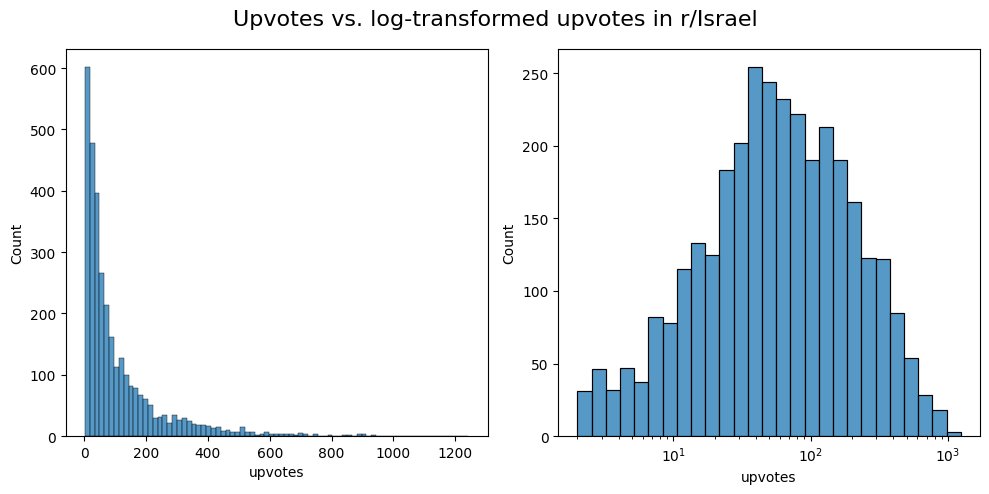

In [63]:
dt['log_upvotes'] = dt['upvotes'].apply(lambda x: np.log(x))

fig, axs = plt.subplots(ncols = 2, figsize=(10, 5))

sns.histplot(ax = axs[0], data=dt, x="upvotes", log_scale = False)
sns.histplot(ax = axs[1], data=dt, x="upvotes", log_scale = True)

fig.suptitle(f'Upvotes vs. log-transformed upvotes in r/{sub_chosen}', fontsize=16)
fig.tight_layout()
plt.show()

#### Standardizing vs. normalizing

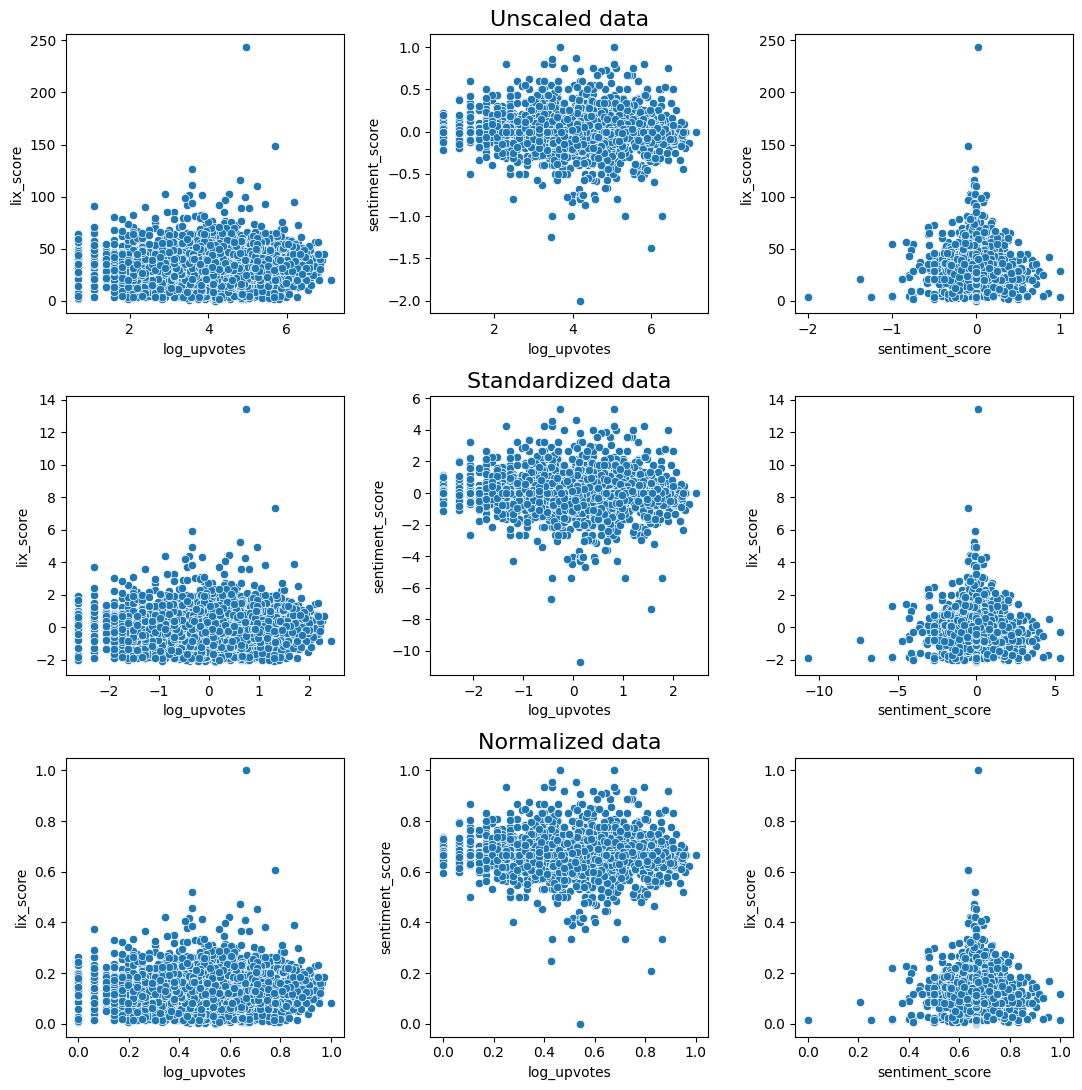

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(11, 11))
cols = ['log_upvotes', 'lix_score', 'sentiment_score']
df_clean = dt[cols]

stn_scaler = StandardScaler()
df_stn = pd.DataFrame(stn_scaler.fit_transform(df_clean), columns=cols)
df_norm = pd.DataFrame(minmax_scale(df_clean, axis = 0), columns=cols)

# df_clean.head(1)
# df_stn.head(1)
# df_norm.head(1)


#Plot for untreated data
axes[0, 1].set_title('Unscaled data', fontsize=16)
sns.scatterplot(ax = axes[0, 0], data=df_clean, x="log_upvotes", y="lix_score")
sns.scatterplot(ax = axes[0, 1], data=df_clean, x="log_upvotes", y="sentiment_score")
sns.scatterplot(ax = axes[0, 2], data=df_clean, x="sentiment_score", y="lix_score")

#Plot for standardized data
axes[1, 1].set_title('Standardized data', fontsize=16)
sns.scatterplot(ax = axes[1, 0], data=df_stn, x="log_upvotes", y="lix_score")
sns.scatterplot(ax = axes[1, 1], data=df_stn, x="log_upvotes", y="sentiment_score")
sns.scatterplot(ax = axes[1, 2], data=df_stn, x="sentiment_score", y="lix_score")


#Plot for normalized data
axes[2, 1].set_title('Normalized data', fontsize=16)
sns.scatterplot(ax = axes[2, 0], data=df_norm, x="log_upvotes", y="lix_score")
sns.scatterplot(ax = axes[2, 1], data=df_norm, x="log_upvotes", y="sentiment_score")
sns.scatterplot(ax = axes[2, 2], data=df_norm, x="sentiment_score", y="lix_score")

# fig.suptitle('Scatterplots of the data', fontsize=16)
plt.tight_layout()
plt.show()

In [71]:
# from scipy.spatial.distance import pdist, squareform

# # Compute distances for original, normalized, and standardized data
# original_distances = pdist(df_clean, metric='euclidean')
# normalized_distances = pdist(df_norm, metric='euclidean')
# standardized_distances = pdist(df_stn, metric='euclidean')

# print(f"Original mean distance: {original_distances.mean()}")
# print(f"Normalized mean distance: {normalized_distances.mean()}")
# print(f"Standardized mean distance: {standardized_distances.mean()}")

# print(f"Variance of normalized data: {df_norm.var(axis=0)}")
# print(f"Variance of standardized data: {df_stn.var(axis=0)}")  # Should be close to 1



Scatterplots
---

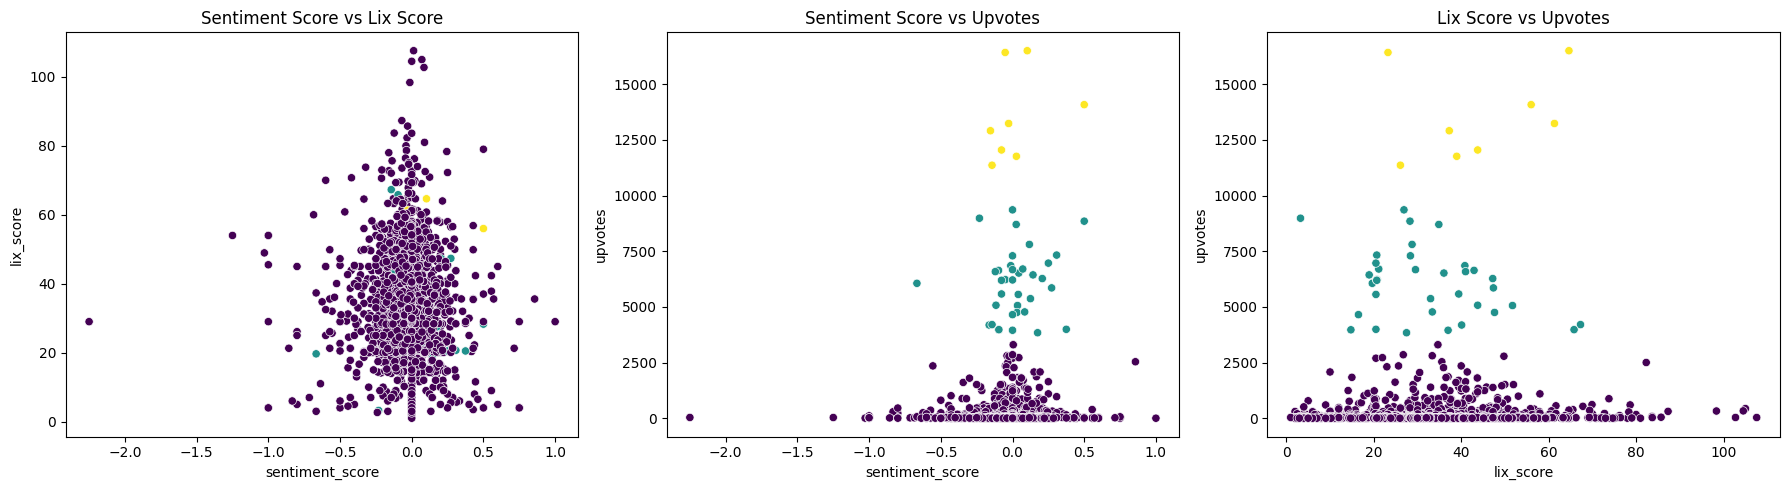

In [12]:
# Create a figure with 3 scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot for sentiment_score vs lix_score
sns.scatterplot(ax=axes[0], x='sentiment_score', y='lix_score', data=df_cluster, c = hierarchical.labels_)
axes[0].set_title('Sentiment Score vs Lix Score')

# Scatter plot for sentiment_score vs upvotes
sns.scatterplot(ax=axes[1], x='sentiment_score', y='upvotes', data=df_cluster, c = hierarchical.labels_)
axes[1].set_title('Sentiment Score vs Upvotes')

# Scatter plot for lix_score vs upvotes
sns.scatterplot(ax=axes[2], x='lix_score', y='upvotes', data=df_cluster, c = hierarchical.labels_)
axes[2].set_title('Lix Score vs Upvotes')

plt.tight_layout()
plt.show()

3D Scatterplots
---

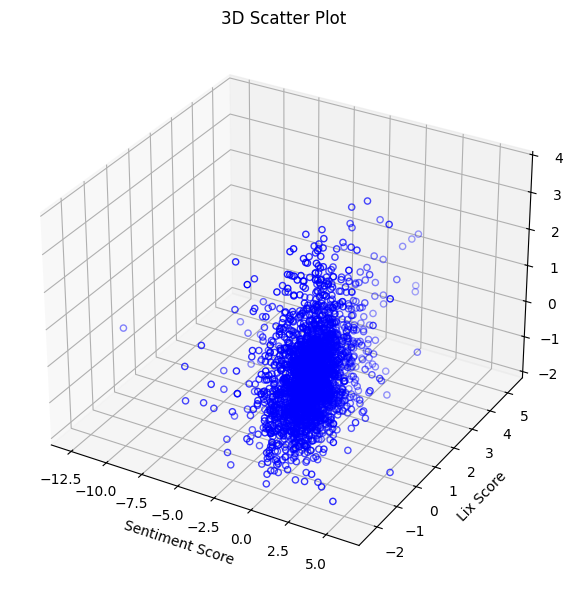

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,6), subplot_kw={'projection':'3d'})
ax.scatter(df_cluster_scaled[:, 0], df_cluster_scaled[:, 1], df_cluster_scaled[:, 2], facecolors='none', edgecolors='b')
# ax.scatter(df_cluster.to_numpy()[:, 0], df_cluster.to_numpy()[:, 1], df_cluster.to_numpy()[:, 2], facecolors='none', edgecolors='b')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Lix Score')
ax.set_title('3D Scatter Plot')
# ax.text2D(0.05, 0.95, "Log-transformed upvotes on the z axis", transform=ax.transAxes)

plt.tight_layout()

Hyperparameter tuning
---

In [ ]:
# Determine the optimal number of clusters with the Elbow Method
knn_inertia = []
hier_inertia = []
DBSCAN_inertia = []

K_range = range(1, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    # hierarchical = AgglomerativeClustering(n_clusters=k)
    # hierarchical.fit(df_cluster_scaled)
    knn_inertia.append(kmeans.inertia_)
    # hier_inertia.append(hierarchical.inertia_)

# Plot the elbow curve
elbow_fig = go.Figure()
elbow_fig.add_trace(go.Scatter(x=list(K_range), y=knn_inertia, name = 'KNN', mode='lines+markers', marker=dict(color='blue')))
# elbow_fig.add_trace(go.Scatter(x=list(K_range), y=hier_inertia, name = 'Hierachical', mode='lines+markers', marker=dict(color='blue')))

elbow_fig.update_layout(
    title="Elbow Method for Optimal k",
    xaxis_title="Number of Clusters (k)",
    yaxis_title="Inertia (Sum of Squared Distances)",
)
elbow_fig.show()


Plot clusters in 3-d space
---

Text(0.5, 0.92, 'DBSCAN')

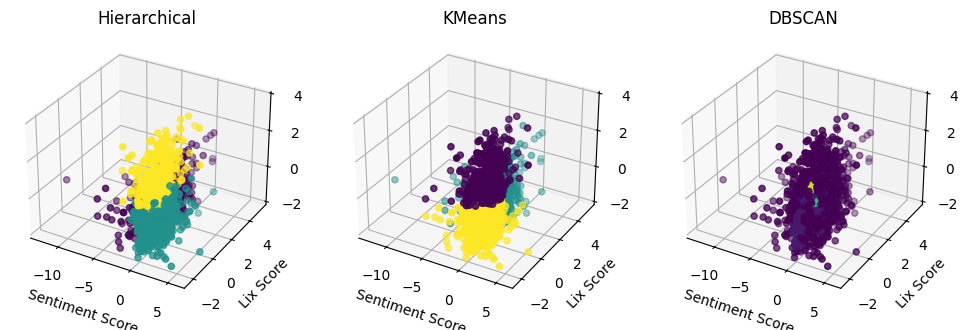

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(12,8), subplot_kw={'projection':'3d'})
for ax in axs:
    ax.set_xlabel('Sentiment Score')
    ax.set_ylabel('Lix Score')

axs[0].scatter(df_cluster_scaled[:,0], df_cluster_scaled[:,1], df_cluster_scaled[:,2], c=hierarchical.labels_)
axs[0].set_title("Hierarchical")

axs[1].scatter(df_cluster_scaled[:,0], df_cluster_scaled[:,1], df_cluster_scaled[:,2], c=kmeans.labels_)
axs[1].set_title("KMeans")

axs[2].scatter(df_cluster_scaled[:,0], df_cluster_scaled[:,1], df_cluster_scaled[:,2], c=dbscan.labels_)
axs[2].set_title("DBSCAN")

